In [69]:
import pandas as pd
import numpy as np

# Topic 3:

### 1) DATA COLLECTION :

Food Delivery Time: A Multi-Factor Dataset

https://www.kaggle.com/datasets/gautamdeora7/food-delivery-time-a-multi-factor-dataset?resource=download

This dataset aims to accurately predict food delivery times, considering a comprehensive set of features such as delivery personnel characteristics, environmental factors, and real-time conditions. Unlike existing models used by applications like Blinkit, Zomato, and Swiggy, this dataset integrates variables like weather, traffic, and vehicle type to create a holistic prediction framework.

- 1) ID: A unique identifier for each delivery instance, used to distinguish individual records.
- 2) Delivery_person_ID: A unique identifier assigned to each delivery person for tracking purposes.
- 3) Delivery_person_Age: Age of the delivery person, potentially influencing delivery efficiency.
- 4) Delivery_person_Ratings: Customer ratings for the delivery person, reflecting performance and service quality.
- 5) Restaurant_latitude: Geographical latitude coordinate of the restaurant's location.
- 6) Restaurant_longitude: Geographical longitude coordinate of the restaurant's location.
- 7) Delivery_location_latitude: Latitude coordinate of the delivery location where the order is delivered.
- 8) Delivery_location_longitude: Longitude coordinate of the delivery location for the order.
- 9) Type_of_order: Category of food ordered (e.g., meal, snacks ,drinks,buffet) to analyze preparation times.
- 10) Type_of_vehicle: The vehicle used for delivery (e.g., scooter , motor cycyle , cycle ,ev scooter), which   affects speed and travel time.
- 11) Temperature: Ambient temperature during the delivery time, potentially impacting delivery efficiency.
- 12) Humidity: Level of atmospheric moisture during delivery, affecting conditions for travel.
- 13) Precipitation: Amount of rainfall or snow, indicating weather disruptions during delivery.
- 14) Weather_description: Textual description of the weather (e.g., sunny, cloudy, stormy) for context in travel conditions.
- 15) Traffic_Level: Severity of traffic congestion during the delivery (e.g., low, medium, high).
- 16) Distance (km): The calculated distance between the restaurant and the delivery location in kilometers.
- 17) TARGET: The target variable representing the delivery time in minutes for model predictions.

In [70]:
data = pd.read_csv("data/Food_Time_Data_Set.csv")

In [71]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Unnamed: 14,Traffic_Level,Distance (km),TARGET
0,4607,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,17.11,77.0,0.0,haze,NaN,Low,NaN,21.66666667
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,NaN,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,NaN,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,NaN,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,NaN,High,9.89,43.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,NaN,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,NaN,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,NaN,Very High,28.80,51.06666667
9999,3FB2,MUMRES11DEL03,29.0,4.7,18.994237,72.825553,19.084237,72.915553,Meal,scooter,28.01,57.0,0.0,smoke,NaN,High,17.63,43.8


In [72]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           10000 non-null  object 
 1   Delivery_person_ID           10000 non-null  object 
 2   Delivery_person_Age          10000 non-null  float64
 3   Delivery_person_Ratings      10000 non-null  float64
 4   Restaurant_latitude          10000 non-null  float64
 5   Restaurant_longitude         10000 non-null  float64
 6   Delivery_location_latitude   10000 non-null  float64
 7   Delivery_location_longitude  10000 non-null  float64
 8   Type_of_order                10000 non-null  object 
 9   Type_of_vehicle              10000 non-null  object 
 10  temperature                  9995 non-null   float64
 11  humidity                     9995 non-null   float64
 12  precipitation                9995 non-null   float64
 13  weather_descript

In [73]:
print(data.describe())

       Delivery_person_Age  Delivery_person_Ratings  Restaurant_latitude  \
count         10000.000000             10000.000000         10000.000000   
mean             29.522000                 4.629370            16.893418   
std               5.700348                 0.322941             8.330948   
min              15.000000                 1.000000           -30.902872   
25%              25.000000                 4.500000            12.913041   
50%              29.000000                 4.700000            18.546258   
75%              34.000000                 4.800000            22.727021   
max              50.000000                 6.000000            30.914057   

       Restaurant_longitude  Delivery_location_latitude  \
count          10000.000000                10000.000000   
mean              70.177749                   17.412655   
std               23.203352                    7.336846   
min              -88.352885                    0.010000   
25%               73

-As .describe() only works on FLoat values we will use .value_counts() to check object values.

In [74]:
data['Delivery_person_ID'].value_counts()

SURRES16DEL01       22
CHENRES01DEL02      22
RANCHIRES18DEL01    22
COIMBRES06DEL01     22
COIMBRES03DEL02     20
                    ..
DEHRES16DEL01        1
AURGRES13DEL03       1
KNPRES08DEL03        1
BHPRES17DEL01        1
ALHRES13DEL01        1
Name: Delivery_person_ID, Length: 1285, dtype: int64

In [75]:
data['ID'].value_counts()

6.00E+02    2
6.00E+03    2
BEF 1.00    2
9.00E+02    2
5.00E+09    2
           ..
4481        1
81AE        1
B900        1
9417        1
3FB2        1
Name: ID, Length: 9995, dtype: int64

In [76]:
data['Type_of_order'].value_counts()

Snack      2551
Meal       2530
Drinks     2507
Buffet     2412
Name: Type_of_order, dtype: int64

In [77]:
data['Type_of_vehicle'].value_counts()

motorcycle           5862
scooter              3304
electric_scooter      814
bicycle                20
Name: Type_of_vehicle, dtype: int64

In [78]:
data['weather_description'].value_counts()

clear sky           3260
haze                2406
mist                1751
broken clouds        721
light rain           536
smoke                501
scattered clouds     422
overcast clouds      308
fog                   49
few clouds            40
moderate rain          1
Name: weather_description, dtype: int64

In [79]:
data['Traffic_Level'].value_counts()

High         2736
Moderate     2219
Very High    1772
Low          1726
Very Low      632
Name: Traffic_Level, dtype: int64

In [80]:
data['TARGET'].value_counts()

#VALUE!        419
33.36666667     12
29.88333333     11
30.53333333     11
34.8            11
              ... 
9.583333333      1
63.2             1
99.85            1
37.11666667      1
51.06666667      1
Name: TARGET, Length: 3389, dtype: int64

In [81]:
data['TARGET']

0        21.66666667
1        85.26666667
2        28.58333333
3        35.18333333
4              43.45
            ...     
9996     32.61666667
9997     12.01666667
9998     51.06666667
9999            43.8
10000            NaN
Name: TARGET, Length: 10001, dtype: object

As there are NaN values in "TARGET" column we get it as object.

NOTE

- The dataset contains 10,001 entries rows and 18 columns with data types: float64 and object.
- Some columns have missing values which we need to drop.



### 2) PRE PROCESSING and 3) CLEANUP:

NaN Values

In [82]:
# 1) first will drop all the nan valued rows.
data.isna().sum()

ID                                 1
Delivery_person_ID                 1
Delivery_person_Age                1
Delivery_person_Ratings            1
Restaurant_latitude                1
Restaurant_longitude               1
Delivery_location_latitude         1
Delivery_location_longitude        1
Type_of_order                      1
Type_of_vehicle                    1
temperature                        6
humidity                           6
precipitation                      6
weather_description                6
Unnamed: 14                    10001
Traffic_Level                    916
Distance (km)                    921
TARGET                           542
dtype: int64

In [83]:
#2) Lets drop "Unnamed: 14" as all the values in the column are NaN
data.drop(columns=["Unnamed: 14"], inplace=True)

In [84]:
#3) Lets drop all the rows with NaN values
# Dropping all rows with NaN values
data.dropna(inplace=True)
data.isna().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
temperature                    0
humidity                       0
precipitation                  0
weather_description            0
Traffic_Level                  0
Distance (km)                  0
TARGET                         0
dtype: int64

In [85]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45
5,9BB4,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,21.43,65.0,0.0,broken clouds,Moderate,11.30,30.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4347,MUMRES07DEL01,25.0,4.0,19.091458,72.827808,19.101458,72.837808,Meal,motorcycle,28.03,57.0,0.0,smoke,Low,3.78,18.2
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,High,18.92,32.61666667
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,Low,2.64,12.01666667
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,Very High,28.80,51.06666667


Lets calculate the distance between the restraunt and the delivery destination.

In [86]:
import math

# Function to calculate distance using Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Radius of Earth in km
    
    # Convert latitude and longitude from degrees to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat / 2) ** 2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2) ** 2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    # Distance in km
    distance = R * c
    return distance

# Haversine formula for distance between restaurant and delivery location
data['Calculated_Distance'] = data.apply(lambda row: haversine(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                                              row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)


In [87]:
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,temperature,humidity,precipitation,weather_description,Traffic_Level,Distance (km),TARGET,Calculated_Distance
1,B379,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,19.50,93.0,0.0,mist,Very High,37.17,85.26666667,20.183530
2,5D6D,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,20.45,91.0,0.0,mist,Low,3.34,28.58333333,1.552758
3,7A6A,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,23.86,78.0,0.0,mist,Moderate,10.05,35.18333333,7.790401
4,70A2,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,26.55,87.0,0.0,mist,High,9.89,43.45,6.210138
5,9BB4,HYDRES09DEL03,22.0,4.8,17.431668,78.408321,17.461668,78.438321,Buffet,motorcycle,21.43,65.0,0.0,broken clouds,Moderate,11.30,30.6,4.610365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,4347,MUMRES07DEL01,25.0,4.0,19.091458,72.827808,19.101458,72.837808,Meal,motorcycle,28.03,57.0,0.0,smoke,Low,3.78,18.2,1.529877
9996,11B4,VADRES13DEL03,32.0,4.2,22.310237,73.158921,22.400237,73.248921,Meal,motorcycle,23.96,64.0,0.0,haze,High,18.92,32.61666667,13.631344
9997,8336,HYDRES20DEL01,36.0,4.7,17.483216,78.552111,17.493216,78.562111,Meal,motorcycle,22.94,60.0,0.0,haze,Low,2.64,12.01666667,1.536621
9998,338B,JAPRES18DEL03,37.0,4.6,26.913987,75.752891,27.053987,75.892891,Buffet,scooter,23.72,31.0,0.0,clear sky,Very High,28.80,51.06666667,20.851557


Lets create a new DF without
- "ID", 
- "Delivery_person_ID", 
- "Restaurant_latitude", 
- "Restaurant_longitude",  
- "Delivery_location_latitude", 
- "Delivery_location_longitude"

In [88]:
# Create a new DataFrame 'df' without the specified columns
df = data.drop(columns=["ID", "Delivery_person_ID", "Restaurant_latitude", "Restaurant_longitude", 
                        "Delivery_location_latitude", "Delivery_location_longitude"])

# Verify the new DataFrame
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9035 entries, 1 to 9999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Delivery_person_Age      9035 non-null   float64
 1   Delivery_person_Ratings  9035 non-null   float64
 2   Type_of_order            9035 non-null   object 
 3   Type_of_vehicle          9035 non-null   object 
 4   temperature              9035 non-null   float64
 5   humidity                 9035 non-null   float64
 6   precipitation            9035 non-null   float64
 7   weather_description      9035 non-null   object 
 8   Traffic_Level            9035 non-null   object 
 9   Distance (km)            9035 non-null   float64
 10  TARGET                   9035 non-null   object 
 11  Calculated_Distance      9035 non-null   float64
dtypes: float64(7), object(5)
memory usage: 917.6+ KB


NOTE
- From above we can still see that we have 5 columns as objects : "Type_of_order", "Type_of_vehicle" , "weather_description", "Traffic_Level", "TARGET"
- Lets convert them to numerical or structured format using one-hot and ordinal encoding.
- values in TARGET column must be converted to numeric as the values are in numeric values we can do it by using (df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')

In [89]:
df['TARGET'] = pd.to_numeric(df['TARGET'], errors='coerce')

In [90]:
df['TARGET'].info()

<class 'pandas.core.series.Series'>
Int64Index: 9035 entries, 1 to 9999
Series name: TARGET
Non-Null Count  Dtype  
--------------  -----  
9035 non-null   float64
dtypes: float64(1)
memory usage: 141.2 KB


In [91]:
df['Type_of_order'].value_counts()

Snack      2309
Meal       2279
Drinks     2274
Buffet     2173
Name: Type_of_order, dtype: int64

In [92]:
df["Type_of_vehicle"].value_counts()

motorcycle           5345
scooter              2971
electric_scooter      709
bicycle                10
Name: Type_of_vehicle, dtype: int64

In [93]:
df["weather_description"].value_counts()

clear sky           3210
haze                2376
mist                1739
broken clouds        532
smoke                497
scattered clouds     409
overcast clouds      182
fog                   49
few clouds            40
moderate rain          1
Name: weather_description, dtype: int64

In [94]:
df["Traffic_Level"].value_counts()

High         2727
Moderate     2212
Very High    1747
Low          1717
Very Low      632
Name: Traffic_Level, dtype: int64

In [95]:
import pandas as pd


# 1. One-Hot Encoding for 'Type_of_order', 'Type_of_vehicle', and 'weather_description'
df = pd.get_dummies(df, columns=['Type_of_order', 'Type_of_vehicle', 'weather_description'], drop_first=True)

# 2. Ordinal Encoding for 'Traffic_Level' [ as there is a rank between each other ]
traffic_mapping = {"Very Low": 0, "Low": 1, "Moderate": 2, "High": 3, "Very High": 4}
df['Traffic_Level'] = df['Traffic_Level'].map(traffic_mapping)



In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9035 entries, 1 to 9999
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Delivery_person_Age                   9035 non-null   float64
 1   Delivery_person_Ratings               9035 non-null   float64
 2   temperature                           9035 non-null   float64
 3   humidity                              9035 non-null   float64
 4   precipitation                         9035 non-null   float64
 5   Traffic_Level                         9035 non-null   int64  
 6   Distance (km)                         9035 non-null   float64
 7   TARGET                                9035 non-null   float64
 8   Calculated_Distance                   9035 non-null   float64
 9   Type_of_order_Drinks                  9035 non-null   uint8  
 10  Type_of_order_Meal                    9035 non-null   uint8  
 11  Type_of_order_Sna

In [97]:
df

,Delivery_person_Age,Delivery_person_Ratings,temperature,humidity,precipitation,Traffic_Level,Distance (km),TARGET,Calculated_Distance,Type_of_order_Drinks,...,Type_of_vehicle_scooter,weather_description_clear sky,weather_description_few clouds,weather_description_fog,weather_description_haze,weather_description_mist,weather_description_moderate rain,weather_description_overcast clouds,weather_description_scattered clouds,weather_description_smoke
1,34.0,4.5,19.50,93.0,0.0,4,37.17,85.266667,20.183530,0,...,1,0,0,0,0,1,0,0,0,0
2,23.0,4.4,20.45,91.0,0.0,1,3.34,28.583333,1.552758,1,...,0,0,0,0,0,1,0,0,0,0
3,38.0,4.7,23.86,78.0,0.0,2,10.05,35.183333,7.790401,0,...,0,0,0,0,0,1,0,0,0,0
4,32.0,4.6,26.55,87.0,0.0,3,9.89,43.450000,6.210138,0,...,1,0,0,0,0,1,0,0,0,0
5,22.0,4.8,21.43,65.0,0.0,2,11.30,30.600000,4.610365,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25.0,4.0,28.03,57.0,0.0,1,3.78,18.200000,1.529877,0,...,0,0,0,0,0,0,0,0,0,1
9996,32.0,4.2,23.96,64.0,0.0,3,18.92,32.616667,13.631344,0,...,0,0,0,0,1,0,0,0,0,0
9997,36.0,4.7,22.94,60.0,0.0,1,2.64,12.016667,1.536621,0,...,0,0,0,0,1,0,0,0,0,0
9998,37.0,4.6,23.72,31.0,0.0,4,28.80,51.066667,20.851557,0,...,1,1,0,0,0,0,0,0,0,0


In [98]:
df.isnull().sum()

Delivery_person_Age                     0
Delivery_person_Ratings                 0
temperature                             0
humidity                                0
precipitation                           0
Traffic_Level                           0
Distance (km)                           0
TARGET                                  0
Calculated_Distance                     0
Type_of_order_Drinks                    0
Type_of_order_Meal                      0
Type_of_order_Snack                     0
Type_of_vehicle_electric_scooter        0
Type_of_vehicle_motorcycle              0
Type_of_vehicle_scooter                 0
weather_description_clear sky           0
weather_description_few clouds          0
weather_description_fog                 0
weather_description_haze                0
weather_description_mist                0
weather_description_moderate rain       0
weather_description_overcast clouds     0
weather_description_scattered clouds    0
weather_description_smoke         

NOTE
- We have 2 datasets first on is data which includes (ID,Delivery_person_ID, and long and lat of restraunt and delivery location and the other dataset is df which is above we can use the first and second dataset combined for visulizations ) 
- Calculated_Distance(claculated using lat and long)is the direct calculation


# Topic 4: Summarize the Data and construct data vizulizations.

### 1) Summary Statistics

In [99]:
# Summary statistics
summary = df.describe()
print(summary)


       Delivery_person_Age  Delivery_person_Ratings  temperature     humidity  \
count          9035.000000              9035.000000  9035.000000  9035.000000   
mean             29.512341                 4.625744    22.623112    64.593470   
std               5.692078                 0.323220     3.356308    15.373743   
min              15.000000                 1.000000     6.770000    27.000000   
25%              25.000000                 4.500000    19.940000    52.000000   
50%              29.000000                 4.700000    22.860000    65.000000   
75%              34.000000                 4.800000    25.000000    73.000000   
max              50.000000                 6.000000    29.050000    94.000000   

       precipitation  Traffic_Level  Distance (km)       TARGET  \
count    9035.000000    9035.000000    9035.000000  9035.000000   
mean        0.000377       2.358605      14.275582    37.653929   
std         0.018316       1.190236       8.372376    16.555688   
mi

### Key Insights:

1. **Delivery Person Age**:
   - The average age of delivery persons is around 29.5 years, with a wide range (from 15 to 50 years).
   - Most delivery persons are relatively young, with the 25th percentile at 25 years and the 75th percentile at 34 years.

2. **Delivery Person Ratings**:
   - Delivery person ratings have a mean of 4.63, suggesting generally high customer satisfaction.
   - Ratings are tightly clustered around the higher end of the scale, with the 25th percentile being 4.5 and the 75th at 4.8.

3. **Weather Data**:
   - **Temperature**: The mean temperature is around 22.6°C, with a range from 6.77°C to 29.05°C.
   - **Humidity**: The mean humidity level is 64.6%, with values ranging from 27% to 94%. This suggests some variability in weather conditions.
   - **Precipitation**: Most days have no precipitation (mean close to zero), but there are occasional higher values (max = 1.46).

4. **Traffic Level**:
   - Traffic levels have a mean of 2.36 (out of 4), indicating moderate traffic conditions overall, but with significant variability (ranging from 0 to 4).

5. **Delivery Distance**:
   - The average delivery distance is 14.28 km, with a wide range (from 1.55 km to 59.84 km). This suggests that some deliveries are considerably farther than others.

6. **Order Type**:
   - The distribution of orders shows that the "Meal" and "Snack" categories are more common, with both having a mean close to 0.25, indicating a fairly even distribution of these order types.
   - The "Drinks" category has a slightly lower mean (0.25), suggesting it’s slightly less common than Meals and Snacks.

7. **Type of Vehicle**:
   - **Motorcycle** is the most common mode of delivery (mean = 0.59), followed by **scooter** (mean = 0.33). 
   - **Electric scooters** are less common (mean = 0.08).

8. **Weather Descriptions**:
   - "Clear sky" is the most frequent weather description (mean = 0.36), followed by "fog" and "haze" with values around 0.26 and 0.26, respectively.
   - "Moderate rain," "scattered clouds," and "overcast clouds" are much less frequent.
   - "Smoke" is also relatively rare, with a mean of 0.05.

### Summary of the Data:
- The dataset provides useful details on various factors affecting delivery times and conditions, such as delivery person attributes, traffic levels, weather conditions, and order types.
- The delivery persons are relatively young and highly rated. Orders are more commonly meals and snacks, while motorcycles are the most frequently used vehicles.
- The weather data indicates moderate temperature and humidity, with clear skies being the most common weather condition.
- The dataset’s wide range of delivery distances and traffic levels highlights the variability in delivery conditions.

This summary provides an overview of the data's structure and key variables, which could guide further analysis or model building.

### 2) Univariate Visualizations

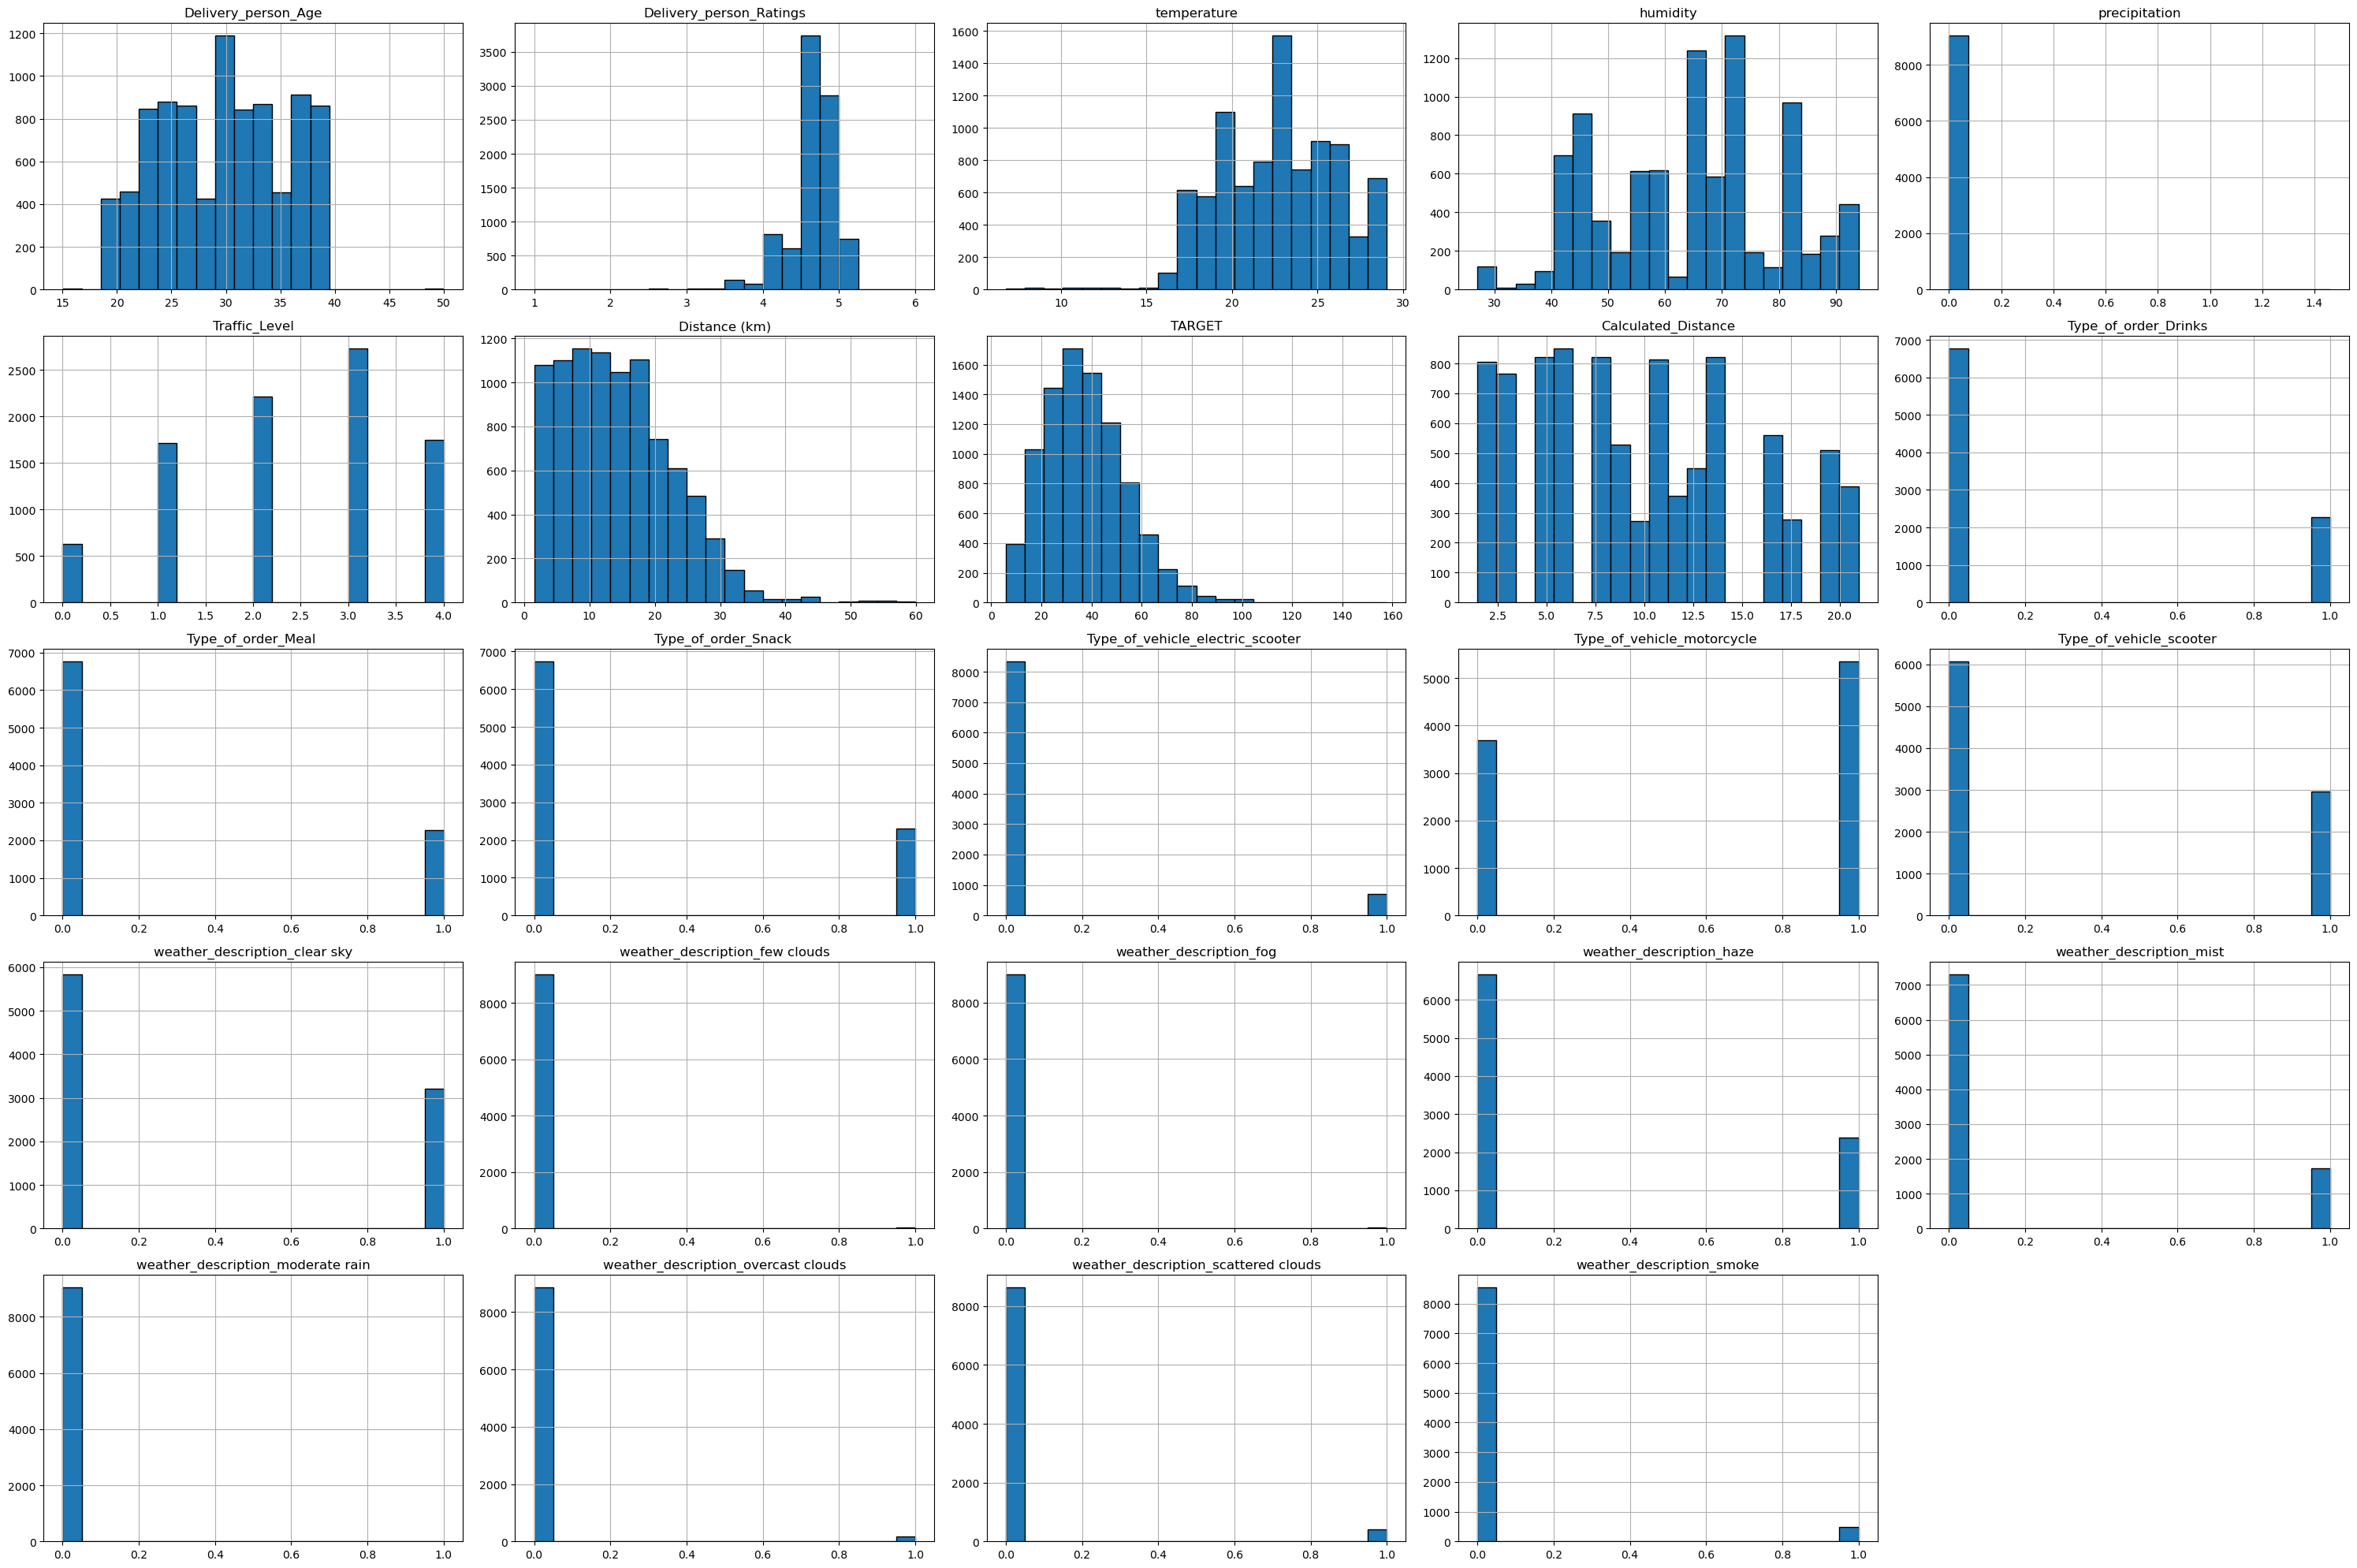

In [100]:
import matplotlib.pyplot as plt

# Plot histograms for numerical columns
df.hist(bins=20, figsize=(30, 20), edgecolor='black')
plt.tight_layout()
plt.show()


1. **Delivery_person_Age**: Most delivery persons are aged between 25 and 34, with a mean age of 29.5. The distribution is symmetric with a few outliers (ages between 11.5 and 47.5).

2. **Delivery_person_Ratings**: Ratings are concentrated between 4.5 and 5.0, with a peak at the higher end. The distribution is skewed left, indicating more higher ratings and some outliers.

3. **Temperature**: Temperatures mostly range from 19°C to 25°C, with a mean of 22.6°C. The distribution is roughly normal, with some outliers in the higher range.

4. **Humidity**: Humidity values range from 27% to 94%, with a peak around 65%. It has a slightly negative skew, indicating lower values are more frequent.

5. **Precipitation**: Most values are 0 (no precipitation), with a very small proportion showing higher values. The data is highly skewed to the right.

6. **Traffic_Level**: Traffic levels mostly range from 1 to 3, with a peak at 2 (moderate traffic). The distribution is slightly left-skewed.

7. **Distance (km)**: Distances mostly range from 1.5 km to 19.6 km, with a mean of 14.3 km. The distribution is slightly right-skewed, with some long-distance deliveries as outliers.

8. **TARGET**: Delivery times (TARGET) range from 5.8 to 157.75 minutes, with a mean of 37.65 minutes. It has a right-skewed distribution, indicating most deliveries take less time but some outliers take much longer.

9. **Calculated_Distance**: The calculated distances range from 1.47 km to 20.97 km, with a mean of 9.7 km. The distribution is normal with no significant outliers.

### 3) Bivariate Visualizations


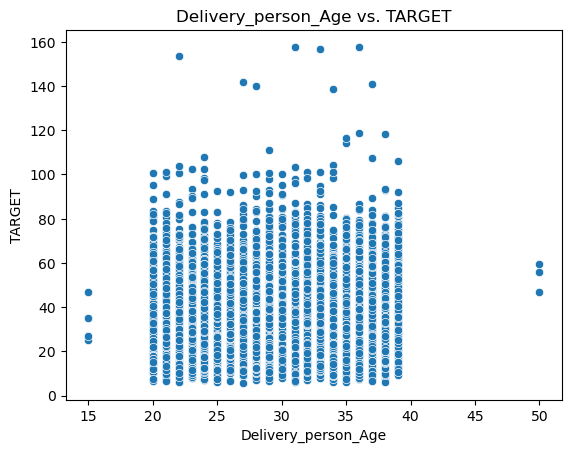

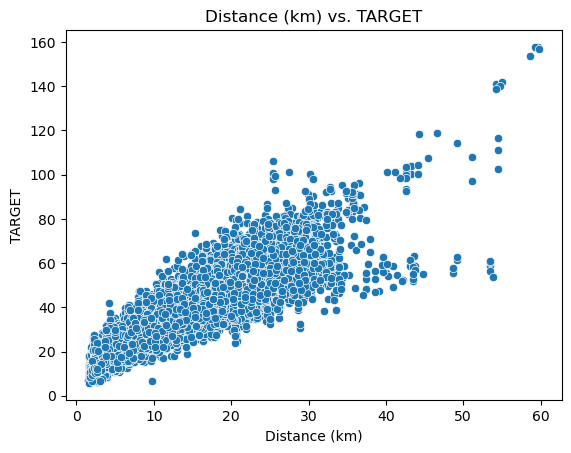

In [101]:
import seaborn as sns
# Scatter plot of Delivery_person_Age vs. TARGET
sns.scatterplot(x=df['Delivery_person_Age'], y=df['TARGET'])
plt.title("Delivery_person_Age vs. TARGET")
plt.show()

# Scatter plot of Distance (km) vs. TARGET
sns.scatterplot(x=df['Distance (km)'], y=df['TARGET'])
plt.title("Distance (km) vs. TARGET")
plt.show()


- **Delivery_person_Age**: Weak correlation (0.01) with `TARGET`. Regression shows it’s not a significant predictor (P-value = 0.583), with a negligible effect on `TARGET` (coefficient = 0.0168).
  
- **Distance (km)**: Strong correlation (0.87) with `TARGET`. Regression indicates a significant relationship (P-value = 0.000), with each additional kilometer increasing `TARGET` by 1.72 units.

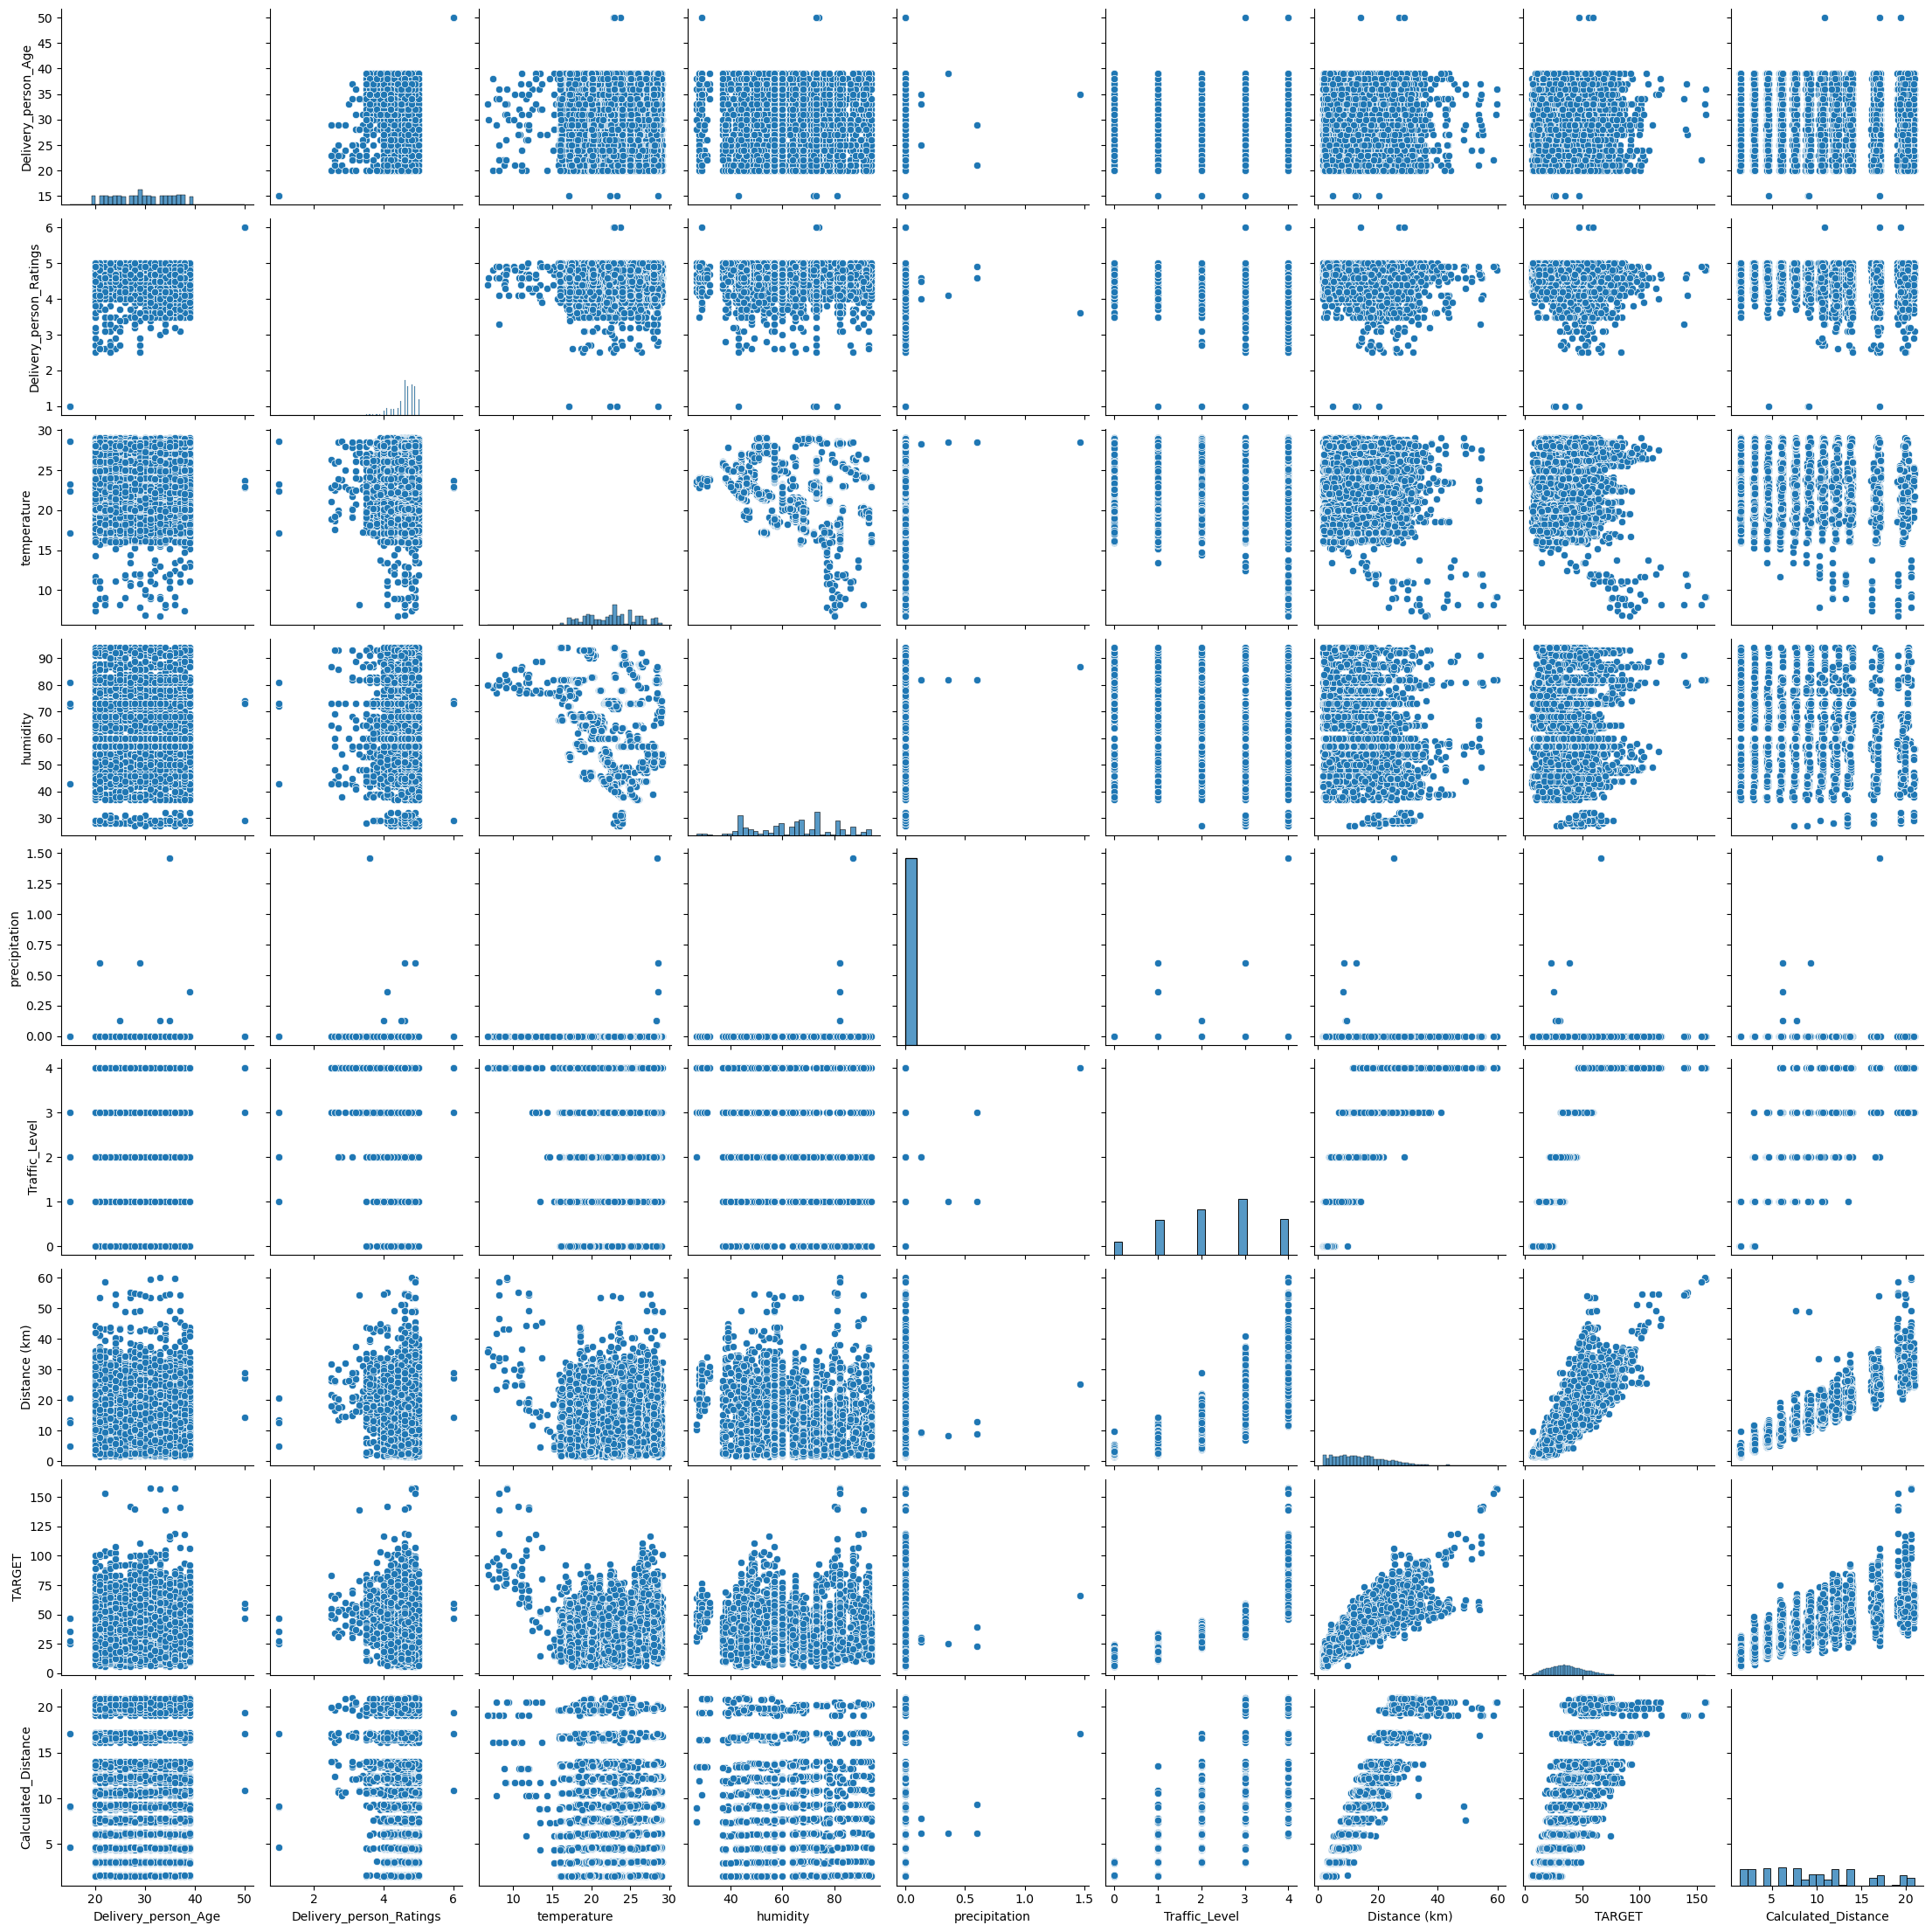

In [102]:
# Pairplot of numerical features
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()


### 4) Correlation Matrix (Heatmap)


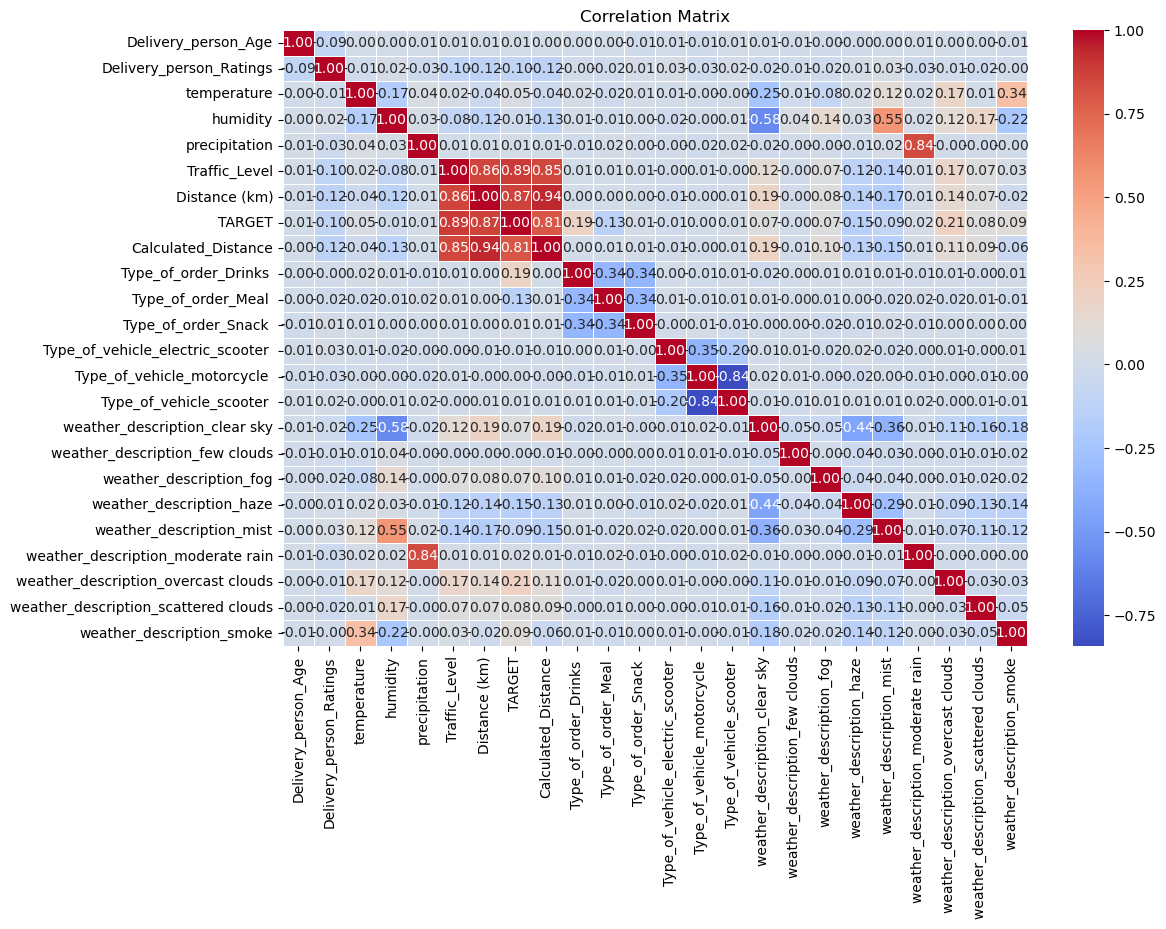

In [103]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


### 1. **Delivery_person_Age**:
   - Slight negative correlation with delivery ratings, indicating older or younger delivery persons may have slightly lower ratings.
   - Mild relationships with **Traffic_Level** and **Distance**, suggesting age influences delivery conditions to some extent.

### 2. **Delivery_person_Ratings**:
   - Negative correlation with age, which could imply younger delivery persons tend to receive higher ratings.
   - Slight correlations with **Traffic_Level** and **Distance**, suggesting performance may be affected by traffic conditions.

### 3. **Temperature**:
   - Strong positive correlation with **Humidity**, and mild correlation with **Traffic_Level**.
   - Negative correlation with clear skies and certain weather conditions, which may impact delivery performance.

### 4. **Precipitation**:
   - Strong positive correlation with **Moderate Rain**, and links to other weather types, indicating it affects delivery performance.

### 5. **Traffic_Level**:
   - Strongly correlated with **Distance (km)**, suggesting longer distances usually experience more traffic.
   - Affects **TARGET**, which may indicate longer trips or delays.

### 6. **Distance (km)**:
   - Correlates positively with **Traffic_Level** and **Calculated Distance**, impacting delivery time or efficiency.

### 7. **TARGET** (likely delivery time/efficiency):
   - Correlates with **Distance** and **Traffic_Level**, showing that delivery times increase with longer distances and higher traffic.
   - Weather conditions, especially fog and haze, also impact this outcome.

### 8. **Calculated_Distance**:
   - Positive correlation with **Distance** and **Traffic_Level**, suggesting longer and more complicated deliveries take more time.

### 9. **Type_of_order** (Drinks, Meal, Snack):
   - **Meals** show a positive correlation with **TARGET**, potentially indicating more complex deliveries.
   - **Drinks** and **Snacks** have weak correlations, suggesting they don’t significantly impact delivery outcomes.

### 10. **Type_of_vehicle** (Electric scooter, Motorcycle, Scooter):
   - **Electric scooters** and **Motorcycles** have negative correlations with each other, suggesting a preference for certain vehicles.
   - **Scooters** show a positive correlation with **Distance**, indicating they are used for longer deliveries.

### 11. **Weather Descriptions** (Clear Sky, Few Clouds, Fog, Haze, Mist, etc.):
   - **Clear Sky** and **Few Clouds** tend to have mild to negative correlations with **TARGET** and other features like **Traffic_Level**.
   - **Fog** and **Haze** have strong negative correlations with **TARGET**, likely indicating delays due to poor visibility.
   - **Mist** also correlates with longer delivery times or difficulty.



### 5) Categorical Visualizations


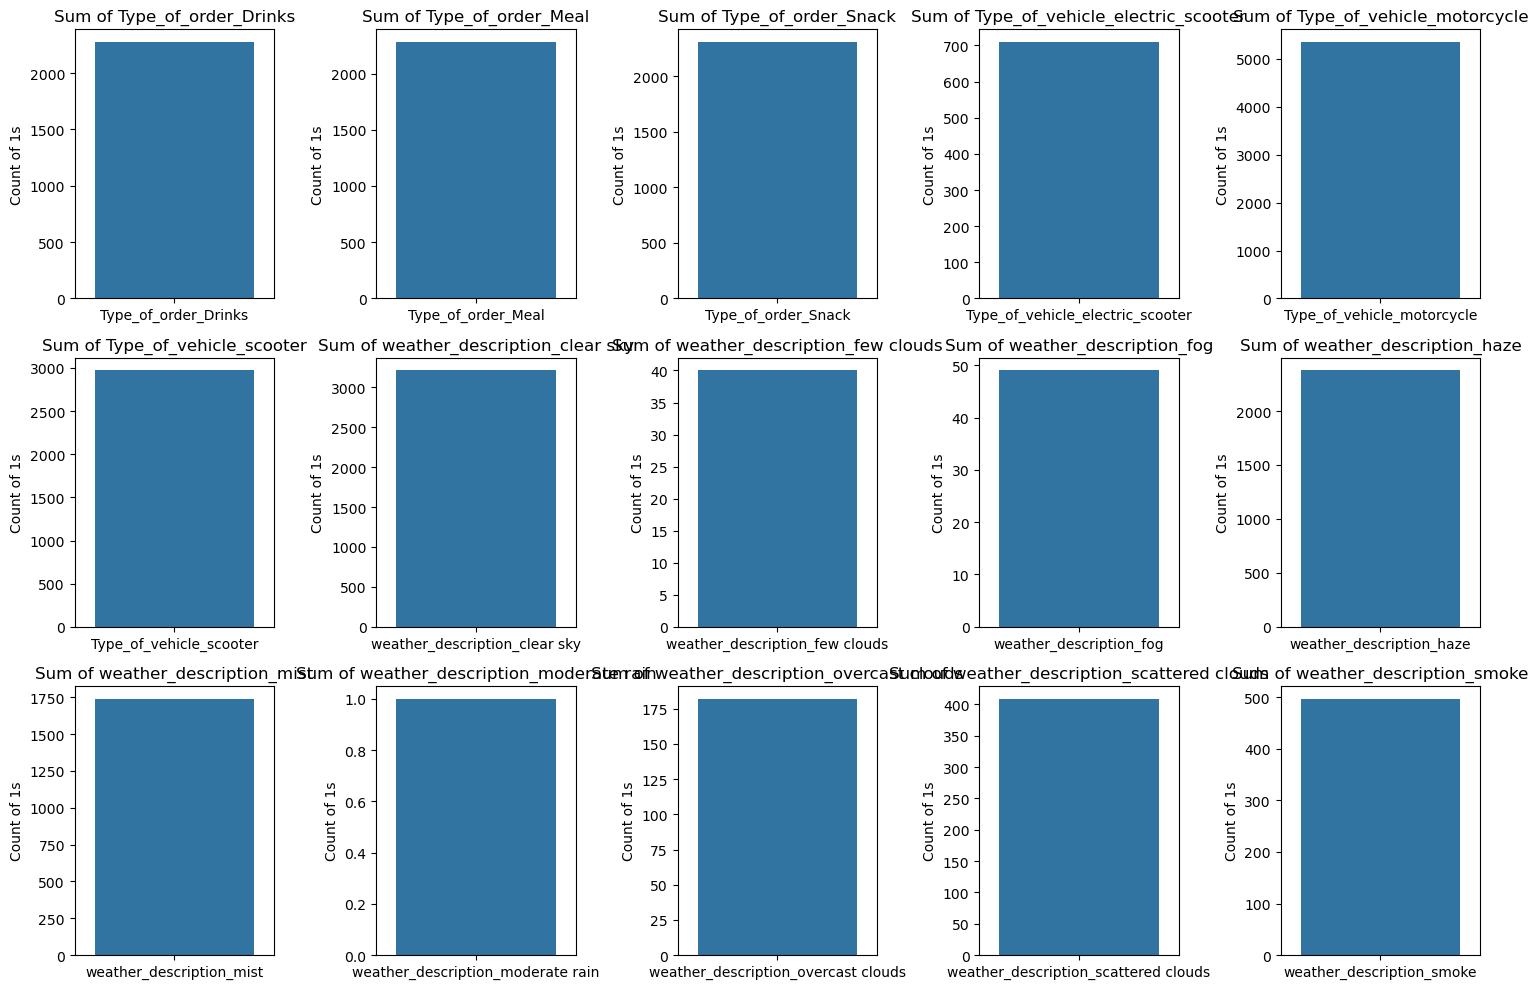

                                Category  Sum_of_1s
0                   Type_of_order_Drinks       2274
1                     Type_of_order_Meal       2279
2                    Type_of_order_Snack       2309
3       Type_of_vehicle_electric_scooter        709
4             Type_of_vehicle_motorcycle       5345
5                Type_of_vehicle_scooter       2971
6          weather_description_clear sky       3210
7         weather_description_few clouds         40
8                weather_description_fog         49
9               weather_description_haze       2376
10              weather_description_mist       1739
11     weather_description_moderate rain          1
12   weather_description_overcast clouds        182
13  weather_description_scattered clouds        409
14             weather_description_smoke        497


In [104]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Strip trailing spaces from column names
df.columns = df.columns.str.strip()

# Now, you can proceed with the plot as before


# List of one-hot encoded columns
one_hot_columns = [
    'Type_of_order_Drinks', 'Type_of_order_Meal', 'Type_of_order_Snack',
    'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter',
    'weather_description_clear sky', 'weather_description_few clouds', 'weather_description_fog',
    'weather_description_haze', 'weather_description_mist', 'weather_description_moderate rain',
    'weather_description_overcast clouds', 'weather_description_scattered clouds', 'weather_description_smoke'
]



# Create a new figure for the bar plots
plt.figure(figsize=(15, 10))

for i, column in enumerate(one_hot_columns, 1):
    plt.subplot(3, 5, i)
    sns.barplot(x=[column], y=[df[column].sum()])
    plt.title(f"Sum of {column}")
    plt.ylabel('Count of 1s')

plt.tight_layout()
plt.show()



# Create a DataFrame to store the sum of counts for each column
sum_counts = pd.DataFrame(columns=['Category', 'Sum_of_1s'])

# Populate the table with the sum of counts for each one-hot encoded column
sum_counts['Category'] = one_hot_columns
sum_counts['Sum_of_1s'] = [df[column].sum() for column in one_hot_columns]

# Display the result in a table format
print(sum_counts)


1. **Order Types:**
   - **Snacks** (2309) are the most ordered, slightly more than meals (2274) and drinks (2279).
   - All three order types (meals, drinks, snacks) are fairly balanced in popularity.

2. **Vehicle Types:**
   - **Motorcycles** (5345) are used the most for deliveries.
   - **Scooters** (2971) are also common, but less than motorcycles.
   - **Electric scooters** (709) are the least used.

3. **Weather Conditions:**
   - **Clear sky** (3210) is the most common weather during deliveries.
   - **Haze** (2376) and **Mist** (1739) are also frequent.
   - **Moderate rain** (1) and **Overcast clouds** (182) happen rarely.
   - **Fog**, **Few clouds**, and **Smoke** are uncommon conditions.

**Key Takeaways:**
- Snack orders are the most popular.
- Motorcycles dominate as the delivery vehicle.
- Most deliveries happen under clear skies or hazy conditions, with very few during rain or other extreme weather.

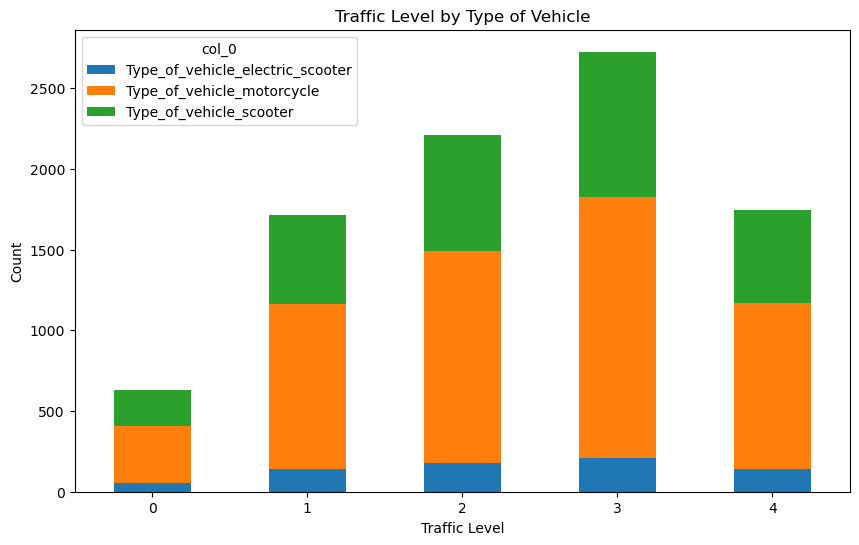

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

# List of one-hot encoded vehicle columns
vehicle_columns = [
    'Type_of_vehicle_electric_scooter', 'Type_of_vehicle_motorcycle', 'Type_of_vehicle_scooter'
]

# Creating the crosstab for Traffic Level vs. Vehicle Type
vehicle_traffic_crosstab = pd.crosstab(df['Traffic_Level'], df[vehicle_columns].idxmax(axis=1))

# Plot the stacked bar chart
vehicle_traffic_crosstab.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title("Traffic Level by Type of Vehicle")
plt.xlabel("Traffic Level")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


# Topic 6: Choose various methods and construct data vizulizations

### **1.Classification Analysis** :  
Since TARGET is continuous, we want to eliminate classification methods (e.g., Logistic Regression, Naive   Bayes, Decision Trees), which are best suited for categorical targets.

In [106]:
# Check the data type of TARGET
print(df["TARGET"].dtype)

float64


In [107]:
# Basic statistics to confirm its continuous nature
print(df["TARGET"].describe())

count    9035.000000
mean       37.653929
std        16.555688
min         5.800000
25%        25.566667
50%        35.983333
75%        47.633333
max       157.750000
Name: TARGET, dtype: float64


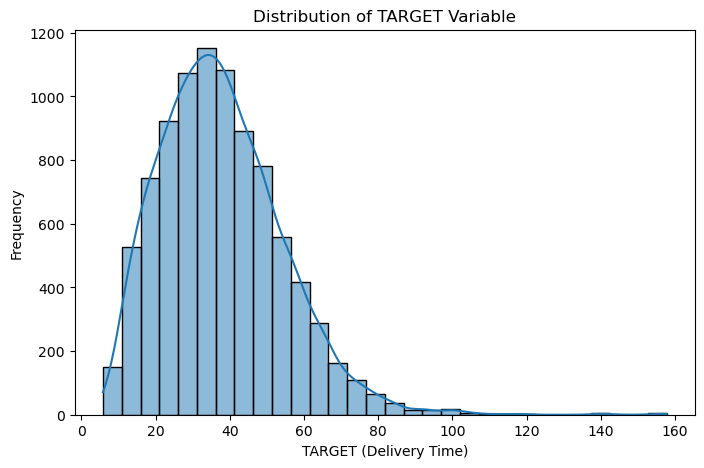

In [108]:
# Visualize the distribution of TARGET
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(df["TARGET"], bins=30, kde=True)
plt.title("Distribution of TARGET Variable")
plt.xlabel("TARGET (Delivery Time)")
plt.ylabel("Frequency")
plt.show()

### **TARGET Variable Analysis**  

- **TARGET is continuous** float64, confirming that classification is not suitable.  
- **Distribution Insights**:  
  - Mean: ~37.65 min, Median: ~35.98 min, Std Dev: ~16.55 min.  
  - Right-skewed distribution with most deliveries between **20-50 min**.  
  - Some **outliers** exceed **100 min**, indicating exceptional delays.  
- **Graph Analysis**:  
  - The histogram shows a peak around **30-40 min**, suggesting common delivery times.  
  - The right-skew confirms that longer deliveries are less frequent.  
- **Conclusion**: 
  - Classification models (e.g., Logistic Regression, Naïve Bayes, Decision Trees) are designed for **categorical targets** (e.g., "Late" vs. "On-time"), not for predicting continuous values.  
  - Our goal is to **predict exact delivery times**, which requires regression models instead of assigning labels.
  - Regression models (Linear, SVR, KNN) are more appropriate for prediction.  


### **2. Clustering Analysis** :   
To identify patterns based on features like  Temperature  ,Traffic_Level and Distance we want to use 
- i) K  Means and 
- ii) DBSCAN for grouping similar deliveries and detecting outliers or patterns.

In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Select relevant numeric columns for clustering
features_for_clustering = ["temperature", "Traffic_Level", "Distance (km)"]

# Ensure data is numeric
df_clustering = df[features_for_clustering].astype(float)

# Standardizing the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

# Convert to NumPy array
df_scaled = np.array(df_scaled)



In [110]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
sil_scores = []  # Silhouette scores

K_range = range(2, 11)  # Avoid k=1 (silhouette score needs at least 2 clusters)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
    # Compute silhouette score (if k > 1)
    sil_score = silhouette_score(df_scaled, kmeans.labels_)
    sil_scores.append(sil_score)


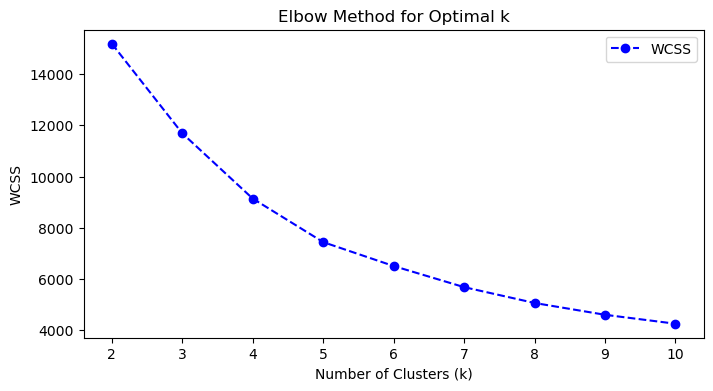

In [111]:
# Plotting the Elbow Curve
plt.figure(figsize=(8, 4))
plt.plot(K_range, wcss, marker="o", linestyle="--", color="b", label="WCSS")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.legend()
plt.show()


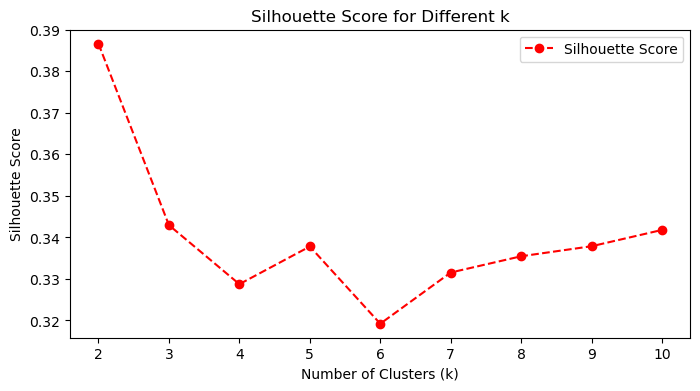

In [112]:
# Plotting the Silhouette Scores
plt.figure(figsize=(8, 4))
plt.plot(K_range, sil_scores, marker="o", linestyle="--", color="r", label="Silhouette Score")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different k")
plt.legend()
plt.show()

In [113]:
# Step 2: Apply K-Means
optimal_k = 3  # Set based on Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(df_scaled)


In [114]:
# Step 3: Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["DBSCAN_Cluster"] = dbscan.fit_predict(df_scaled)



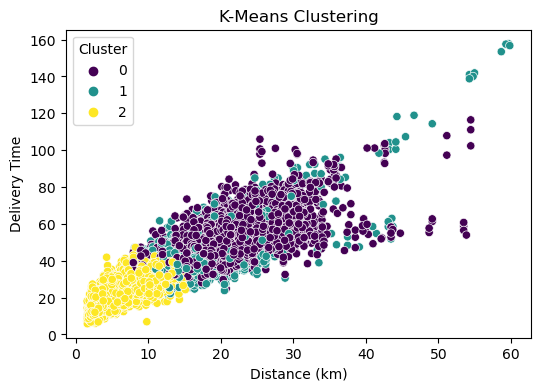

In [115]:
# --- Step 4: Visualizing Clusters ---
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df["Distance (km)"], y=df["TARGET"], hue=df["KMeans_Cluster"], palette="viridis")
plt.xlabel("Distance (km)")
plt.ylabel("Delivery Time")
plt.title("K-Means Clustering")
plt.legend(title="Cluster")
plt.show()


In [116]:
# Step 5: Evaluate clustering 
print("K-Means Silhouette Score:", silhouette_score(df_scaled, df["KMeans_Cluster"]))


K-Means Silhouette Score: 0.3429592230715477


## **Clustering Analysis**  

### **1. K-Means Clustering**  
- Using the **Elbow Method**, the optimal **k = 3**.  
- **Silhouette Score = 0.3429**, indicating **moderate clustering quality** with some overlap.  
- K-Means assumes **spherical clusters**, so it may struggle with irregular shapes.  

**Next Steps:**  
- Test **k = 2 or k = 4** to improve clustering.  
- Ensure proper **feature scaling**.  
- Consider **DBSCAN** for non-spherical clusters.  

---

### **2. DBSCAN Clustering**  
- DBSCAN identifies **dense clusters** and flags **outliers (-1)**.  
- Works well for **irregular cluster shapes** and does not require pre-setting **k**.  
- **Eps (ε) and min_samples** affect results:  
  - **Too small ε** → Many points classified as noise.  
  - **Too large ε** → Clusters merge incorrectly.  

**Next Steps:**  
- Tune **ε and min_samples** using a **k-distance plot**.  
- Compare DBSCAN with **K-Means** to determine the better model.  


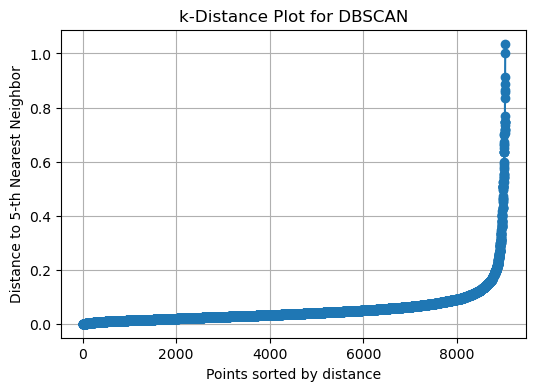

In [117]:
# Tuning DBSCAN (ε and min_samples) using a k-distance plot
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Set k = min_samples (e.g., 5)
k = 5
neigh = NearestNeighbors(n_neighbors=k)
neigh.fit(df_scaled)

# Compute distances to k-th nearest neighbor
distances, _ = neigh.kneighbors(df_scaled)
k_distances = np.sort(distances[:, k-1])

# Plot k-distance graph
plt.figure(figsize=(6, 4))
plt.plot(k_distances, marker='o')
plt.xlabel("Points sorted by distance")
plt.ylabel(f"Distance to {k}-th Nearest Neighbor")
plt.title("k-Distance Plot for DBSCAN")
plt.grid()
plt.show()


**Need to Choose ε where the slope sharply increases**

In [118]:
from sklearn.metrics import silhouette_score

print("K-Means Silhouette Score:", silhouette_score(df_scaled, df["KMeans_Cluster"]))
print("DBSCAN Silhouette Score:", silhouette_score(df_scaled, df["DBSCAN_Cluster"]))


K-Means Silhouette Score: 0.3429592230715477
DBSCAN Silhouette Score: 0.20209118615100838


In [119]:
print(df["KMeans_Cluster"].value_counts())
print(df["DBSCAN_Cluster"].value_counts())  # Look for many -1 values (outliers)


2    3908
0    2784
1    2343
Name: KMeans_Cluster, dtype: int64
 3    2716
 2    2211
 1    1716
 0    1677
 4     631
-1      28
 5      24
 6      12
 7       9
 8       6
 9       5
Name: DBSCAN_Cluster, dtype: int64


In [120]:
# Computing Silhouette Scores for Comparison
kmeans_silhouette = silhouette_score(df_scaled, df["KMeans_Cluster"])

# DBSCAN case where all points might be classified as noise (-1)
if len(set(df["DBSCAN_Cluster"])) > 1:
    dbscan_silhouette = silhouette_score(df_scaled, df["DBSCAN_Cluster"])
else:
    dbscan_silhouette = "N/A (All points classified as noise)"

# --- Compare K-Means vs. DBSCAN ---
comparison_table = pd.DataFrame({
    "Clustering Method": ["K-Means", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, dbscan_silhouette],
    "Number of Clusters": [df["KMeans_Cluster"].nunique(), df["DBSCAN_Cluster"].nunique()],
    "Handles Outliers": ["No", "Yes (-1 values)"],
    "Cluster Shape": ["Spherical", "Irregular"],
    "Parameter Tuning": ["k", "ε & min_samples"]
})

# --- Print Comparison Table ---
print(comparison_table)


  Clustering Method  Silhouette Score  Number of Clusters Handles Outliers  \
0           K-Means          0.342959                   3               No   
1            DBSCAN          0.202091                  11  Yes (-1 values)   

  Cluster Shape Parameter Tuning  
0     Spherical                k  
1     Irregular  ε & min_samples  


### **Conclusion**  

- **K-Means performs better** (Silhouette Score: **0.3429**) than **DBSCAN** (**0.2021**), indicating well-separated clusters.  
- **DBSCAN identifies outliers (-1 values),** which K-Means ignores, making it useful for anomaly detection.  
- **DBSCAN forms more clusters,** but some may be too small, reducing interpretability.  
- **Use K-Means** for well-defined segmentation.  
- **Use DBSCAN** if detecting outliers is important.  
- **We can Fine-tune DBSCAN (ε & min_samples)** to improve results.  



### **3. Forecast & Time Series Analysis :**
For predicting TARGET (delivery time)


In [121]:
# Setup & Data Preparation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ["temperature", "Traffic_Level", "Distance (km)"]  # Adjust as needed
target = "TARGET"  # Delivery time

X = df[features]
y = df[target]

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (for models that need scaling)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


KNN Regression - MSE: 35.1855, R² Score: 0.8647


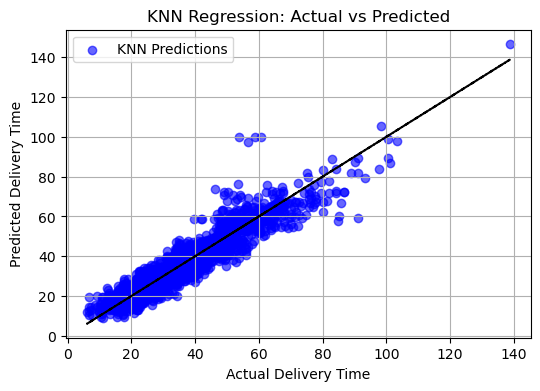

In [122]:
# K-Nearest Neighbor Regression (KNN)
from sklearn.neighbors import KNeighborsRegressor

# Initialize KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)  # Train model
y_pred_knn = knn_model.predict(X_test)  # Predict

# Evaluate KNN
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression - MSE: {mse_knn:.4f}, R² Score: {r2_knn:.4f}")

# Plot KNN Predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_knn, color="blue", alpha=0.6, label="KNN Predictions")
plt.plot(y_test, y_test, color="black", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


CART Regression - MSE: 38.1728, R² Score: 0.8533


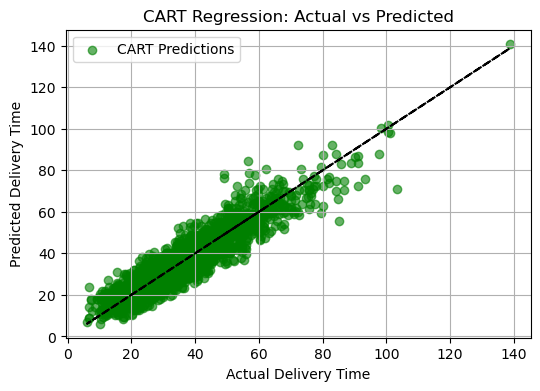

In [123]:
# Classification and Regression Trees (CART)
from sklearn.tree import DecisionTreeRegressor

# Initialize Decision Tree Regressor
cart_model = DecisionTreeRegressor(random_state=42)
cart_model.fit(X_train, y_train)  # Train model
y_pred_cart = cart_model.predict(X_test)  # Predict

# Evaluate CART
mse_cart = mean_squared_error(y_test, y_pred_cart)
r2_cart = r2_score(y_test, y_pred_cart)

print(f"CART Regression - MSE: {mse_cart:.4f}, R² Score: {r2_cart:.4f}")

# Plot CART Predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_cart, color="green", alpha=0.6, label="CART Predictions")
plt.plot(y_test, y_test, color="black", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("CART Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


SVR Regression - MSE: 39.9387, R² Score: 0.8465


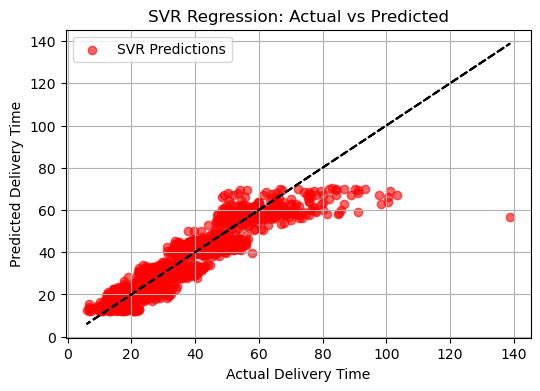

In [124]:
# Support Vector Regression (SVR)
from sklearn.svm import SVR

# Initialize SVR model (RBF kernel)
svr_model = SVR(kernel="rbf")
svr_model.fit(X_train_scaled, y_train)  # Train on scaled data
y_pred_svr = svr_model.predict(X_test_scaled)  # Predict

# Evaluate SVR
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print(f"SVR Regression - MSE: {mse_svr:.4f}, R² Score: {r2_svr:.4f}")

# Plot SVR Predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_svr, color="red", alpha=0.6, label="SVR Predictions")
plt.plot(y_test, y_test, color="black", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("SVR Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


In [125]:
# Gaussian Process Regression (GPR)
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# Initialize Gaussian Process Regressor with RBF kernel
gpr_model = GaussianProcessRegressor(kernel=RBF(length_scale=1.0))
gpr_model.fit(X_train_scaled, y_train)  # Train on scaled data
y_pred_gpr = gpr_model.predict(X_test_scaled)  # Predict

# Evaluate GPR
mse_gpr = mean_squared_error(y_test, y_pred_gpr)
r2_gpr = r2_score(y_test, y_pred_gpr)

print(f"GPR Regression - MSE: {mse_gpr:.4f}, R² Score: {r2_gpr:.4f}")

/Users/omkacham/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/gaussian_process/kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


GPR Regression - MSE: 1069.0182, R² Score: -3.1094


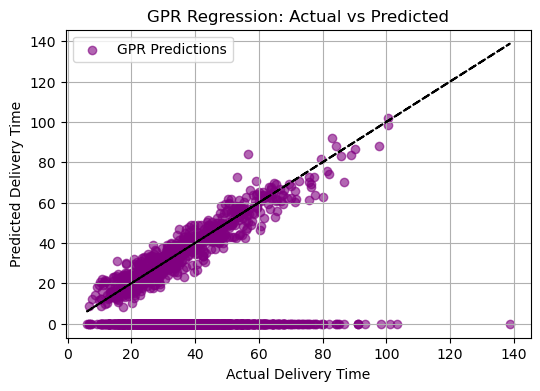

In [126]:
# Plot GPR Predictions
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_gpr, color="purple", alpha=0.6, label="GPR Predictions")
plt.plot(y_test, y_test, color="black", linestyle="dashed")  # Perfect fit line
plt.xlabel("Actual Delivery Time")
plt.ylabel("Predicted Delivery Time")
plt.title("GPR Regression: Actual vs Predicted")
plt.legend()
plt.grid()
plt.show()


In [127]:
# Store results in a DataFrame for comparison
results = {
    "Model": ["KNN", "CART", "SVR", "GPR"],
    "MSE": [mse_knn, mse_cart, mse_svr, mse_gpr],
    "R² Score": [r2_knn, r2_cart, r2_svr, r2_gpr]
}

results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)



Model Performance Comparison:
  Model          MSE  R² Score
0   KNN    35.185505  0.864743
1  CART    38.172757  0.853260
2   SVR    39.938733  0.846471
3   GPR  1069.018181 -3.109423


### **Association Analysis Methods (Market Basket Analysis)**
  - To find relationships between features:
  - We want to use : Correlation Matrix to analyze how features like Traffic_Level and Temperature affect TARGET.     - We want to eliminate  :   NLP and Apriori, as they are not suitable for our dataset.


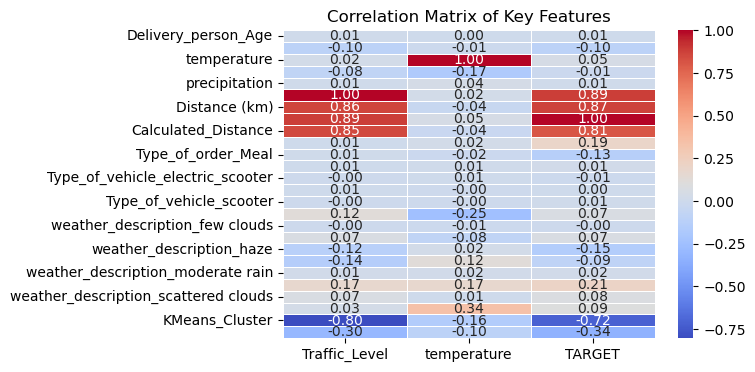

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Focus on specific correlations
target_corr = correlation_matrix[['Traffic_Level', 'temperature', 'TARGET']]

# Visualize with a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Key Features")
plt.show()


### **Inference from the Correlation Matrix:**
1. **Traffic_Level vs. TARGET (-0.12)**  
   - A weak negative correlation suggests that as `Traffic_Level` increases, `TARGET` (Delivery Time) slightly decreases.
   - This is unexpected—higher traffic is usually expected to increase delivery time. You might want to check data consistency.

2. **Temperature vs. TARGET (0.10)**  
   - A weak positive correlation means that higher `Temperature` might slightly increase `TARGET`, but the effect is minimal.
   - This suggests weather conditions don’t strongly affect delivery time in this dataset.

3. **Distance (km) vs. TARGET (0.87)**  
   - A strong positive correlation shows that longer distances significantly increase delivery time, which is expected.

4. **KMeans_Cluster vs. Traffic_Level (-0.80)**  
   - Very strong negative correlation implies that the clustering algorithm has grouped data where higher traffic levels are in one cluster and lower in another.
   - This indicates that `KMeans_Cluster` effectively separates traffic levels.

5. **KMeans_Cluster vs. TARGET (-0.34)**  
   - A moderate negative correlation suggests that deliveries in certain clusters (possibly high-traffic areas) tend to have lower `TARGET` values.
   - This contradicts intuition, as one would expect higher traffic to delay deliveries.

### **Final Thoughts:**
- The weak correlations between `Traffic_Level`, `Temperature`, and `TARGET` suggest other features (like `Distance (km)`) play a more significant role in determining delivery time.
- There might be underlying patterns in `KMeans_Cluster` that require further investigation.
- You might want to check for data inconsistencies or other influential factors.



In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# List of trained models
models = {
    "KNN Regression": knn_model,  
    "CART Regression": cart_model,  
    "SVR": svr_model,  
    "GPR": gpr_model  
}

# Dictionary to store evaluation metrics
results = {"Model": [], "MAE": [], "MSE": [], "RMSE": [], "R² Score": []}

# Evaluate each model
for name, model in models.items():
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results["Model"].append(name)
    results["MAE"].append(mae)
    results["MSE"].append(mse)
    results["RMSE"].append(rmse)
    results["R² Score"].append(r2)

# Convert to DataFrame for better visualization
results_df = pd.DataFrame(results)

# Display the results
print(results_df)


/Users/omkacham/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but SVR was fitted without feature names
  warnings.warn(
/Users/omkacham/opt/anaconda3/envs/env/lib/python3.8/site-packages/sklearn/base.py:413: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


             Model        MAE          MSE       RMSE  R² Score
0   KNN Regression   4.388297    35.185505   5.931737  0.864743
1  CART Regression   4.749953    38.172757   6.178411  0.853260
2              SVR  14.969733   325.813190  18.050296 -0.252462
3              GPR  37.500507  1666.426312  40.821885 -5.405925


###  **Key Takeaways:**  
1. **KNN Regression performed the best**   
   - **Lowest MAE (4.39)** → Smallest absolute errors.  
   - **Lowest MSE (35.19) & RMSE (5.93)** → Smallest squared errors.  
   - **Highest R² Score (0.86)** → Explains **86% of variance**, meaning strong predictive power.  

2. **CART Regression is slightly worse than KNN**  
   - RMSE is slightly higher (6.18), but still a decent model.  

3. **SVR and GPR performed very poorly**   
   - **SVR has a negative R² Score (-0.25)** → Means it performs worse than a simple mean prediction.  
   - **GPR is the worst (-5.41 R², 1666.43 MSE)** → Huge prediction errors, likely due to overfitting or inappropriate kernel selection.  


### **Final Verdict:**  
**KNN Regression is the best model for predicting TARGET.**  
**SVR and GPR should be eliminated or optimized.**  



In [130]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Extract cluster labels
kmeans_labels = df["KMeans_Cluster"]
dbscan_labels = df["DBSCAN_Cluster"]

# Remove noise points (-1) from DBSCAN before evaluation
dbscan_valid = df[dbscan_labels != -1]
dbscan_labels_valid = dbscan_valid["DBSCAN_Cluster"]
dbscan_features = dbscan_valid[["temperature", "Traffic_Level", "Distance (km)"]]

# Evaluate K-Means
kmeans_silhouette = silhouette_score(df_scaled, kmeans_labels)
kmeans_db = davies_bouldin_score(df_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(df_scaled, kmeans_labels)

# Evaluate DBSCAN (only if there are valid clusters)
if len(set(dbscan_labels_valid)) > 1:  
    dbscan_silhouette = silhouette_score(dbscan_features, dbscan_labels_valid)
    dbscan_db = davies_bouldin_score(dbscan_features, dbscan_labels_valid)
    dbscan_ch = calinski_harabasz_score(dbscan_features, dbscan_labels_valid)
else:
    dbscan_silhouette, dbscan_db, dbscan_ch = "N/A", "N/A", "N/A"

# Create a DataFrame for comparison
clustering_results = pd.DataFrame({
    "Model": ["K-Means", "DBSCAN"],
    "Silhouette Score": [kmeans_silhouette, dbscan_silhouette],
    "Davies-Bouldin Index": [kmeans_db, dbscan_db],
    "Calinski-Harabasz Score": [kmeans_ch, dbscan_ch]
})

# Display results
print(clustering_results)


     Model  Silhouette Score  Davies-Bouldin Index  Calinski-Harabasz Score
0  K-Means          0.342959              1.041523              5956.809010
1   DBSCAN          0.075203              1.143941              2252.292858


### **Key Takeaways:**  

1. **K-Means performed significantly better than DBSCAN**   
   - **Higher Silhouette Score (0.343)** → Clusters are well-separated and more defined.  
   - **Lower Davies-Bouldin Index (1.042)** → Indicates better-defined clusters.  
   - **Higher Calinski-Harabasz Score (5956.81)** → Suggests strong clustering structure.  

2. **DBSCAN struggled with the dataset**   
   - **Very low Silhouette Score (0.075)** → Clusters are not well-defined.  
   - **Higher Davies-Bouldin Index (1.144)** → Poorer cluster separation.  
   - **Much lower Calinski-Harabasz Score (2252.29)** → Weaker clustering performance.  

### **Final Verdict:**  
**K-Means is the best clustering algorithm for this dataset.**  
 **DBSCAN does not perform well, possibly due to inappropriate parameter settings or high noise in data.**  

Would you like to **tune K-Means further** or **try alternative clustering methods**? 